In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import timeit


import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample


#other learners
from xgboost import XGBClassifier
import lightgbm as lgb

#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

#webscraping
import requests
from bs4 import BeautifulSoup
import re
import urllib
from IPython.core.display import HTML

#time series
import statsmodels.api as sm
from pylab import rcParams
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns


#warning ignorer
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

## **EDA and Data cleaning **

In [ ]:
# Accident_Information.csv has 2047256 rows 
df1 = pd.read_csv('/content/drive/MyDrive/omdena/Accident_Information.csv', delimiter=',')
df1.dataframeName = 'Accident_Information.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.head()

There are 2047256 rows and 34 columns


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


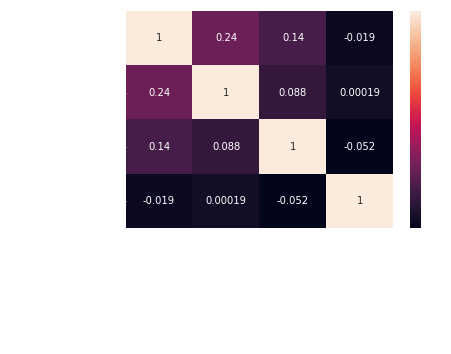

In [ ]:
import seaborn as sn

df = pd.DataFrame(df1,columns=['Number_of_Casualties',
       'Number_of_Vehicles', 'Speed_limit', 'Time', 'Weather_Conditions',
       'Year'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df2= pd.read_csv('/content/drive/MyDrive/omdena/Vehicle_Information.csv', encoding='ISO-8859-1')
print('Records:', df2.shape[0], '\nColumns:', df2.shape[1])
df2.head()

Records: 2177205 
Columns: 24


,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,ROVER,45 CLASSIC 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,BMW,C1,NaN,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,NISSAN,MICRA CELEBRATION 16V,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,LONDON TAXIS INT,TXII GOLD AUTO,NaN,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,PIAGGIO,VESPA ET4,Petrol,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [ ]:
#merge dataframes
df = pd.merge(df1,df2)

In [ ]:
df = df.drop(['Driver_Home_Area_Type', 'Driver_IMD_Decile','Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model',
       'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway',
       'Vehicle_Location.Restricted_Lane', 'Vehicle_Manoeuvre',
       'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive',
       'X1st_Point_of_Impact','1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number','Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location','Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Type', 'Special_Conditions_at_Site', 'Urban_or_Rural_Area', 'InScotland'
            ], axis=1)

In [ ]:
#check columns
print("Names of Combined Columns:\n",df.columns, "\n")
print("\nShape:\n",df.shape)

Names of Combined Columns:
 Index(['Accident_Index', 'Accident_Severity', 'Date', 'Day_of_Week',
       'Light_Conditions', 'Number_of_Casualties', 'Number_of_Vehicles',
       'Road_Surface_Conditions', 'Speed_limit', 'Time', 'Weather_Conditions',
       'Year', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Engine_Capacity_.CC.'],
      dtype='object') 


Shape:
 (2058408, 15)


In [ ]:
df.describe(include ='all')


,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Speed_limit,Time,Weather_Conditions,Year,Age_Band_of_Driver,Age_of_Vehicle,Engine_Capacity_.CC.
count,2058408,2058408,2058408,2058408,2058408,2.058408e+06,2.058408e+06,2058408,2.058343e+06,2058262,2058408,2.058408e+06,2058408,1.720446e+06,1.808091e+06
unique,1389724,3,4383,7,6,NaN,NaN,6,NaN,1439,10,NaN,12,NaN,NaN
top,2013460234852,Slight,2016-11-25,Friday,Daylight,NaN,NaN,Dry,NaN,17:00,Fine no high winds,NaN,26 - 35,NaN,NaN
freq,53,1765650,1052,341797,1544491,NaN,NaN,1435328,NaN,19468,1661250,NaN,424291,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.449605e+00,2.124032e+00,NaN,3.975699e+01,NaN,NaN,2.011334e+03,NaN,7.143248e+00,2.028291e+03
std,NaN,NaN,NaN,NaN,NaN,1.033484e+00,9.641580e-01,NaN,1.460916e+01,NaN,NaN,3.391307e+00,NaN,4.728746e+00,1.914150e+03
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,2.005000e+03,NaN,1.000000e+00,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.000000e+00,NaN,3.000000e+01,NaN,NaN,2.009000e+03,NaN,3.000000e+00,1.299000e+03
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.000000e+00,NaN,3.000000e+01,NaN,NaN,2.012000e+03,NaN,7.000000e+00,1.598000e+03
75%,NaN,NaN,NaN,NaN,NaN,2.000000e+00,2.000000e+00,NaN,5.000000e+01,NaN,NaN,2.014000e+03,NaN,1.000000e+01,1.997000e+03


In [ ]:
# number of missing values in the data set
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100


Age_of_Vehicle             16.418611
Engine_Capacity_.CC.       12.160709
Time                        0.007093
Speed_limit                 0.003158
Age_Band_of_Driver          0.000000
Year                        0.000000
Weather_Conditions          0.000000
Road_Surface_Conditions     0.000000
Number_of_Vehicles          0.000000
Number_of_Casualties        0.000000
Light_Conditions            0.000000
Day_of_Week                 0.000000
Date                        0.000000
Accident_Severity           0.000000
Accident_Index              0.000000
dtype: float64

In [ ]:
#Delete all missing values
df.dropna(inplace=True)


In [ ]:
# number of missing values in the data set
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100


Engine_Capacity_.CC.       0.0
Age_of_Vehicle             0.0
Age_Band_of_Driver         0.0
Year                       0.0
Weather_Conditions         0.0
Time                       0.0
Speed_limit                0.0
Road_Surface_Conditions    0.0
Number_of_Vehicles         0.0
Number_of_Casualties       0.0
Light_Conditions           0.0
Day_of_Week                0.0
Date                       0.0
Accident_Severity          0.0
Accident_Index             0.0
dtype: float64

Outliers Handle 

In [ ]:
#engine_capacity_cc
df['Engine_Capacity_.CC.'].describe()

count    1.704138e+06
mean     2.034436e+03
std      1.909882e+03
min      1.000000e+00
25%      1.299000e+03
50%      1.598000e+03
75%      1.997000e+03
max      9.600000e+04
Name: Engine_Capacity_.CC., dtype: float64

In [ ]:
#first I'm going to handle both ends of outliers.
#(determine the min and max cuttoffs for detecting the outlier)
q75, q25 = np.percentile(df['Engine_Capacity_.CC.'].dropna(), [75 ,25])
iqr = q75 - q25
 
ecmin = q25 - (iqr*1.5)
ecmax = q75 + (iqr*1.5)

print(ecmax)
print(ecmin)

df = df[df['Engine_Capacity_.CC.']<=ecmax]
df = df[df['Engine_Capacity_.CC.']>=ecmin]




3044.0
252.0


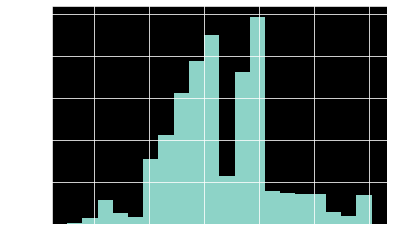

In [ ]:
df['Engine_Capacity_.CC.'].hist(bins=20)
plt.style.use('dark_background')


In [ ]:
df['Engine_Capacity_.CC.'].describe()


count    1.508424e+06
mean     1.656617e+03
std      4.791368e+02
min      2.520000e+02
25%      1.331000e+03
50%      1.598000e+03
75%      1.991000e+03
max      3.020000e+03
Name: Engine_Capacity_.CC., dtype: float64

In [ ]:
df_num = df[['Accident_Index', 'Accident_Severity', 'Date', 'Day_of_Week',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit', 'Time',
       'Weather_Conditions', 'Year', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Engine_Capacity_.CC.']]


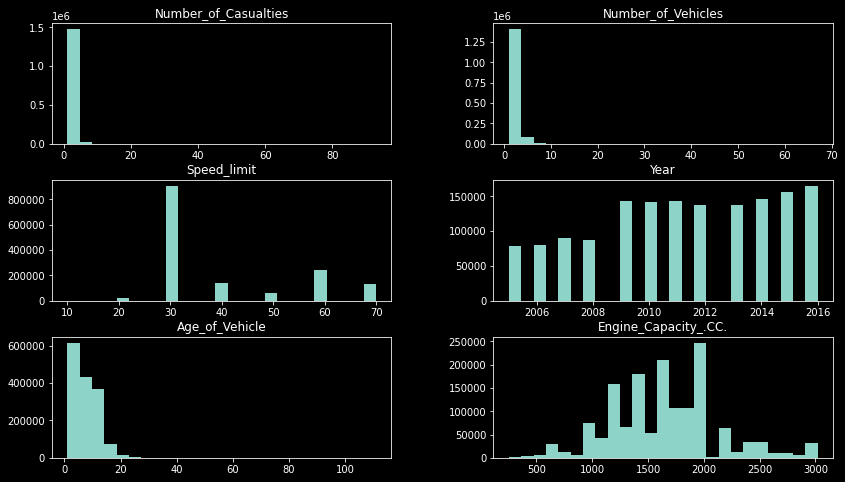

In [ ]:
df_num.hist( bins=25, grid=False, figsize=(14,8))
plt.style.use('dark_background')


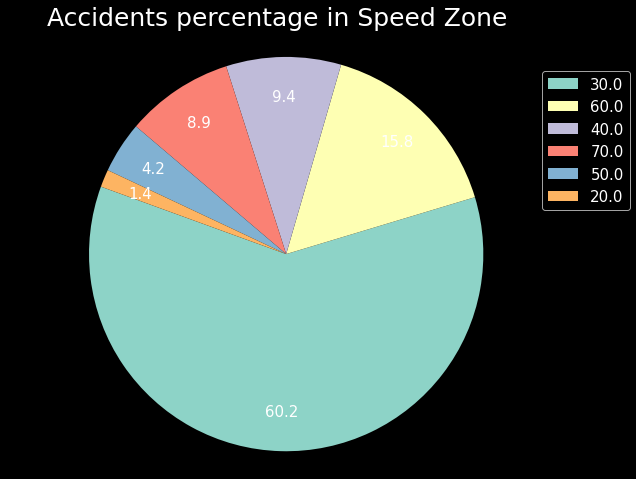

In [ ]:
speed_zone_accidents = df.loc[df['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed = speed_zone_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,textprops={'fontsize': 15})
 
plt.axis('equal')
plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()

DataGroup creating and Engineering features

In [ ]:
# #number_of_casualties
df['Number_of_Casualties'].value_counts()

1     1045871
2      303754
3       98104
4       36574
5       14201
6        5698
7        2048
8         935
9         434
10        233
11        151
12         89
13         79
14         45
70         40
16         39
36         26
26         21
17         15
15         14
19          7
18          7
21          6
87          4
22          4
24          4
43          3
29          3
38          2
40          2
25          2
93          1
23          1
27          1
32          1
41          1
42          1
58          1
62          1
20          1
Name: Number_of_Casualties, dtype: int64

In [ ]:
#create casualities grouping

def casualities(num_cas):
    if num_cas >=1 and num_cas <2:
        return "1"
    elif num_cas >=2 and num_cas <3:
        return "2"
    elif num_cas >=3 and num_cas <4:
        return "3"
    elif num_cas >= 4 and num_cas <5:
        return "4"
    elif num_cas >= 5:
        return "5+"

In [ ]:
#apply function   
df['Number_of_Casualties']= df['Number_of_Casualties'].apply(casualities)


In [ ]:
#number_of_casualties
df['Number_of_Casualties'].value_counts()

1     1045871
2      303754
3       98104
4       36574
5+      24121
Name: Number_of_Casualties, dtype: int64

This function below returns the number of unique elements we have for each variable hence make it easier to identify which variable can be seen as factors

In [ ]:

# #unique values
df.nunique().sort_values(ascending=False)

Accident_Index             1124072
Date                          4383
Time                          1439
Engine_Capacity_.CC.          1343
Age_of_Vehicle                  80
Number_of_Vehicles              27
Age_Band_of_Driver              12
Year                            12
Weather_Conditions              10
Speed_limit                      8
Day_of_Week                      7
Road_Surface_Conditions          6
Light_Conditions                 6
Number_of_Casualties             5
Accident_Severity                3
dtype: int64

I’ve added a bunch of new features such as Year, Month, Week and time_slot. Those features will be crucial to make deeper exploratory analysis.



In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df ['Date'].apply(lambda time: time.month)
#creating a weekend feature that includes Friday-Sunday
df['weekend']= np.where(df['Day_of_Week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

#create time of day feature with Morning Rush, Day, Noon Rush, Afternoon, After Work Rush, Night

#time of day dictionary
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

                  

In [ ]:
#pull time data and create hour column
df['hour'] = df['Time'].str[0:2]
 
#convert to numeric    
df['hour'] =  pd.to_numeric(df['hour'])
df['hour'] = df['hour'].fillna(-1)
#convert to integer
df['hour'] = df['hour'].astype('int')


In [ ]:

#create time_of_day grouping

def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"


In [ ]:
df['time_of_day']= df['hour'].apply(daygroup)
df[['weekend','Day_of_Week','Time', 'time_of_day']].tail(10)


,weekend,Day_of_Week,Time,time_of_day
2058395,0,Monday,11:40,2
2058396,0,Wednesday,17:00,5
2058397,0,Monday,16:32,5
2058398,0,Monday,16:32,5
2058399,0,Thursday,12:00,3
2058401,1,Friday,06:45,1
2058402,1,Friday,06:45,1
2058403,0,Tuesday,16:45,5
2058406,1,Saturday,20:00,6
2058407,1,Sunday,12:30,3


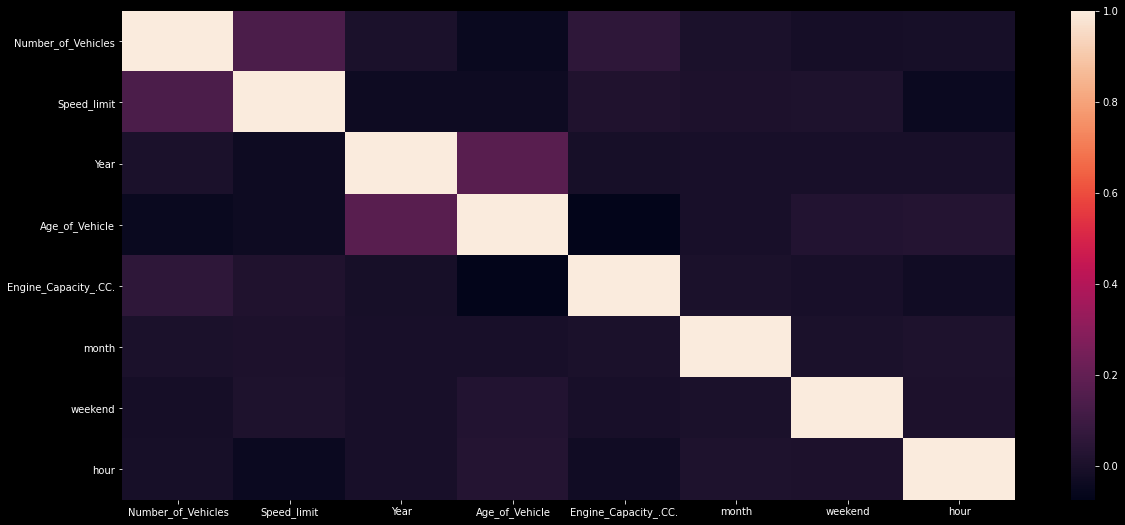

In [ ]:
corr = df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [ ]:
df.head()

,Accident_Index,Accident_Severity,Date,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Speed_limit,Time,Weather_Conditions,Year,Age_Band_of_Driver,Age_of_Vehicle,Engine_Capacity_.CC.,month,weekend,hour,time_of_day
2,200501BS00004,Slight,2005-01-07,Friday,Daylight,1,1,Dry,30.0,10:35,Fine no high winds,2005,46 - 55,4.0,1769.0,1,1,10,2
4,200501BS00006,Slight,2005-01-11,Tuesday,Daylight,1,2,Wet or damp,30.0,12:40,Raining no high winds,2005,46 - 55,1.0,2976.0,1,0,12,3
9,200501BS00012,Slight,2005-01-16,Sunday,Darkness - lights lit,1,1,Dry,30.0,00:42,Fine no high winds,2005,26 - 35,6.0,1988.0,1,1,0,7
11,200501BS00016,Slight,2005-01-18,Tuesday,Darkness - lights lit,1,2,Wet or damp,30.0,05:01,Raining no high winds,2005,26 - 35,2.0,698.0,1,0,5,7
12,200501BS00016,Slight,2005-01-18,Tuesday,Darkness - lights lit,1,2,Wet or damp,30.0,05:01,Raining no high winds,2005,26 - 35,4.0,2148.0,1,0,5,7


Splitting and prepare data for LightGBM Model Implementation 

In [ ]:


num_cols = ['Engine_Capacity_.CC.']
# define categorical feature columns
cat_cols = ['Number_of_Casualties', 'Number_of_Vehicles',
       'Road_Surface_Conditions', 'Speed_limit','weekend',
        'Age_Band_of_Driver', 'Age_of_Vehicle', 'Engine_Capacity_.CC.']

# define target col
target_col = ['Accident_Severity']

cols = cat_cols + num_cols + target_col

# copy dataframe - just to be safe
df_model = df[cols].copy()
df_model.shape

(1508424, 10)

create Dummy variables  from categorical features which makes them a lot easier to quantify and compare

In [ ]:
# create dummy variables from the categorical features
dummies = pd.get_dummies(df_model[cat_cols], drop_first=True)
df_model = pd.concat([df_model[num_cols], df_model[target_col], dummies], axis=1)
df_model.shape

(1508424, 29)

In [ ]:
df_model.isna().sum().sum()


0

In [ ]:
# define our features 
features = df_model.drop(['Accident_Severity'], axis=1)

# define our target
target = df_model[['Accident_Severity']]

In [ ]:
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [ ]:
df_model['Accident_Severity'].value_counts(normalize=True)


Slight     0.864942
Serious    0.122605
Fatal      0.012453
Name: Accident_Severity, dtype: float64

LightGBM Model for Classification
 implementation

In [ ]:
# evaluate the model
model = LGBMClassifier()

# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(X_train, y_train)
# make  prediction
y_pred = model.predict(X_test)

# evaluate
report = classification_report(y_test, y_pred)
print('Classification Report LightGBM : \n', report)

Classification Report LightGBM : 
               precision    recall  f1-score   support

       Fatal       0.86      0.00      0.01      3710
     Serious       0.53      0.01      0.02     37104
      Slight       0.87      1.00      0.93    260871

    accuracy                           0.87    301685
   macro avg       0.75      0.34      0.32    301685
weighted avg       0.82      0.87      0.81    301685



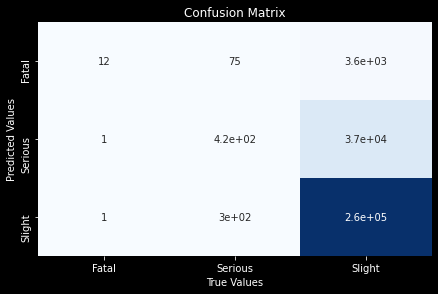

In [ ]:
# create confusion matrix# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [ ]:
cross_val_score(model, X_train, y_train, scoring='f1_macro', n_jobs=-1)


array([0.31724656, 0.31848162, 0.31767481, 0.31734149, 0.31716052])

Managing Imblance Classes with SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
# view previous class distribution
print('Before Upsampling with SMOTE:'), print(target['Accident_Severity'].value_counts())

# resample data ONLY using training data
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train) 

# view synthetic sample class distribution
print('\nAfter Upsampling with SMOTE:'), print(pd.Series(y_resampled).value_counts())

Before Upsampling with SMOTE:
Slight     1304700
Serious     184940
Fatal        18784
Name: Accident_Severity, dtype: int64

After Upsampling with SMOTE:
Fatal      1043829
Slight     1043829
Serious    1043829
dtype: int64


(None, None)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

In [ ]:
# evaluate the model
model2= LGBMClassifier()

# fit the model on the whole dataset
model2 = LGBMClassifier()
model2.fit(X_train, y_train)
# make  prediction
y_pred = model2.predict(X_test)

# evaluate
report = classification_report(y_test, y_pred)
print('Classification Report LightGBM \n', report)

Classification Report LightGBM 
               precision    recall  f1-score   support

       Fatal       0.76      0.83      0.79    260700
     Serious       0.75      0.50      0.60    261641
      Slight       0.79      0.98      0.87    260531

    accuracy                           0.77    782872
   macro avg       0.77      0.77      0.76    782872
weighted avg       0.77      0.77      0.76    782872



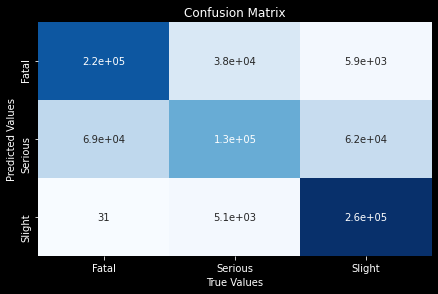

In [ ]:
# create confusion matrix# create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

In [ ]:
cross_val_score(model2, X_train, y_train, scoring='f1_macro', n_jobs=-1)


array([0.75516301, 0.75419894, 0.7553475 , 0.75570449, 0.75526307])

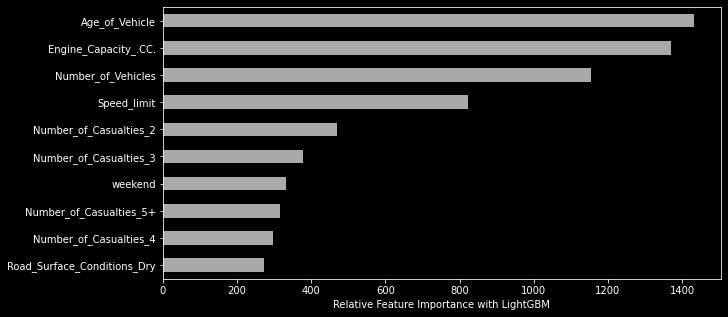

In [ ]:
# plot the important features
feat_importances = pd.Series(model2.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with LightGBM');